# image Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
artist_arts_len = {artist : len(os.listdir(f'./selected_artist/{artist}')) for artist in os.listdir('./selected_artist') if not artist.startswith(".")}

In [3]:
artist_arts_len

{'Alfred_Sisley': 260,
 'Francisco_Goya': 291,
 'Marc_Chagall': 239,
 'Paul_Gauguin': 311,
 'Paul_Klee': 188,
 'Rembrandt': 262,
 'Rene_Magritte': 194,
 'Titian': 256}

In [4]:
CLASSES= [artist for artist in os.listdir('./selected_artist') if not artist.startswith(".")]

In [5]:
CLASSES

['Alfred_Sisley',
 'Francisco_Goya',
 'Marc_Chagall',
 'Paul_Gauguin',
 'Paul_Klee',
 'Rembrandt',
 'Rene_Magritte',
 'Titian']

In [6]:
def show_img_jupyter(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [7]:
def resizing_square(path, dim):
    origin_img = cv2.imread(path)
    return cv2.resize(origin_img, (dim, dim))

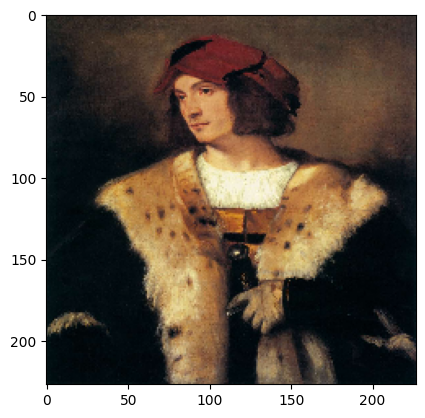

In [8]:
path = "./selected_artist/Titian/Titian_105.jpg"
show_img_jupyter(resizing_square(path, 227))

In [9]:
resizing_square(path, 227).shape

(227, 227, 3)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(4012)
IMG_SIZE = 224
datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen_train.flow_from_directory(directory="selected_artist/",
                                               target_size=(IMG_SIZE, IMG_SIZE),
                                               color_mode="rgb",
                                               classes=CLASSES,
                                               class_mode="categorical",
                                               batch_size=32,
                                               shuffle=True,
                                               subset='training')

valid_data = datagen_train.flow_from_directory(directory="selected_artist/",
                                               target_size=train_data.target_size,
                                               color_mode=train_data.color_mode,
                                               classes=list(train_data.class_indices.keys()),
                                               class_mode=train_data.class_mode,
                                               batch_size=train_data.batch_size,
                                               shuffle=train_data.shuffle,
                                               subset='validation')

Found 1605 images belonging to 8 classes.
Found 397 images belonging to 8 classes.


In [11]:
X_train = []
y_train = []
for i in range(len(train_data)):
    batch = next(train_data)
    X_train.append(batch[0])
    y_train.append(batch[1])

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

# Extract all batches of the data
X_val = []
y_val = []
for i in range(len(valid_data)):
    batch = next(valid_data)
    X_val.append(batch[0])
    y_val.append(batch[1])

X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)

print(X_train.shape)

(1605, 224, 224, 3)


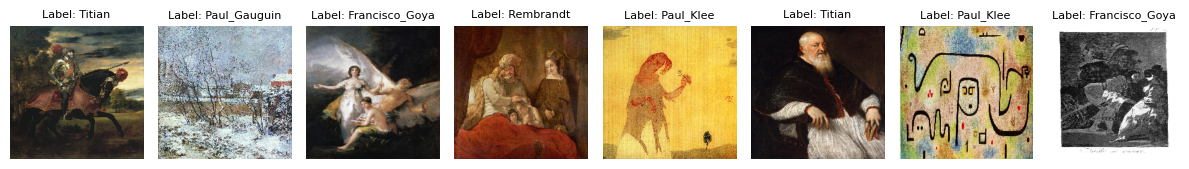

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(12, 4))

for i in range(8):
    index = np.random.randint(32)
    image = train_data[0][0][index]
    label_index = np.argmax(train_data[0][1][index])
    label = CLASSES[label_index]
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}", fontsize = 8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [27]:
import Baseline
Baseline = Baseline.Baseline()

Baseline.compile(
    optimizer=keras.optimizers.Adam(1e-3), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history_Baseline = Baseline.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
51/51 [==============================] - 24s 452ms/step - loss: 4.3885 - accuracy: 0.1340 - val_loss: 2.0787 - val_accuracy: 0.1310
Epoch 2/20
51/51 [==============================] - 23s 447ms/step - loss: 2.0779 - accuracy: 0.1483 - val_loss: 2.0767 - val_accuracy: 0.1562
Epoch 3/20
51/51 [==============================] - 23s 444ms/step - loss: 2.0763 - accuracy: 0.1551 - val_loss: 2.0751 - val_accuracy: 0.1562
Epoch 4/20
51/51 [==============================] - 23s 445ms/step - loss: 2.0747 - accuracy: 0.1551 - val_loss: 2.0736 - val_accuracy: 0.1562
Epoch 5/20
51/51 [==============================] - 23s 444ms/step - loss: 2.0735 - accuracy: 0.1551 - val_loss: 2.0721 - val_accuracy: 0.1562
Epoch 6/20
51/51 [==============================] - 23s 445ms/step - loss: 2.0723 - accuracy: 0.1551 - val_loss: 2.0709 - val_accuracy: 0.1562
Epoch 7/20
51/51 [==============================] - 23s 447ms/step - loss: 2.0714 - accuracy: 0.1551 - val_loss: 2.0698 - val_accuracy: 0.1562

In [28]:
import AlexNet
AlexNet = AlexNet.AlexNet()

AlexNet.compile(
    optimizer=keras.optimizers.Adam(1e-3), 
    loss='categorical_crossentropy', 
    metrics='accuracy'
)

history_AlexNet = AlexNet.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
51/51 [==============================] - 72s 1s/step - loss: 17.4000 - accuracy: 0.2754 - val_loss: 129.8019 - val_accuracy: 0.1285
Epoch 2/20
51/51 [==============================] - 69s 1s/step - loss: 4.2133 - accuracy: 0.3146 - val_loss: 9.7656 - val_accuracy: 0.1108
Epoch 3/20
51/51 [==============================] - 70s 1s/step - loss: 2.4452 - accuracy: 0.4112 - val_loss: 2.6820 - val_accuracy: 0.2569
Epoch 4/20
51/51 [==============================] - 70s 1s/step - loss: 2.0457 - accuracy: 0.4075 - val_loss: 2.1053 - val_accuracy: 0.2897
Epoch 5/20
51/51 [==============================] - 72s 1s/step - loss: 1.7327 - accuracy: 0.4474 - val_loss: 1.9628 - val_accuracy: 0.3073
Epoch 6/20
51/51 [==============================] - 70s 1s/step - loss: 1.7622 - accuracy: 0.4530 - val_loss: 2.1295 - val_accuracy: 0.3703
Epoch 7/20
51/51 [==============================] - 70s 1s/step - loss: 1.6924 - accuracy: 0.4879 - val_loss: 2.5109 - val_accuracy: 0.3451
Epoch 8/20
51/51 

In [ ]:
import VGG16
VGG16 = VGG16.VGG16()

VGG16.compile(
    optimizer=keras.optimizers.Adam(1e-4), 
    loss='categorical_crossentropy', 
    metrics='accuracy'
)

history_VGG16 = VGG16.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)

In [ ]:
import VGG19
VGG19 = VGG19.VGG19()

VGG19.compile(
    optimizer=keras.optimizers.Adam(1e-3), 
    loss='categorical_crossentropy', 
    metrics='accuracy'
)

history_VGG19 = VGG19.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)